<h1>
<center>
Assignment 3: Classification: GDA and SVM
</center>
</h1>
<center>
CS 4262/5262 - Foundations of Machine Learning<br>
Vanderbilt University, Spring 2023<br>
Due: Check Brightspace
</center>
<hr>
<br>This assignment will focus on Gaussian Discriminant Analysis and Support Vector Machines. In addition to programming tasks, there are short-answer questions throughout the notebook. 

Contact: Quan Liu quan.liu@vanderbilt.edu for any clarifying questions.

### Please enter your name:  Claire Cross




In [1]:
import csv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import scipy as sp
from sklearn import datasets
from sklearn.svm import SVC 
# add package here if needed 
import pandas as pd
import seaborn as sns

---
## Part 1: Gaussian Discriminant Analysis

The following questions relate to Gaussian Discriminant Analysis (GDA). 

**Task 1**
- Write a function (or a set of functions) that takes in a set of training data and returns the maximum likelihood estimates of the parameters $\mu_0$, $\mu_1$, $\Sigma$, and $\phi_y$. Assume that the class covariance matrices are equal, which results in a linear decision boundary. You can use the formulas provided in the lecture notes for the maximum likelihood estimates of each parameter (i.e., no need to derive those from scratch). 

- Load the Wine dataset (the same files as Assignment2 are included in this distribution). Choose columns of citric acid and total sulfur dioxide as input X. 
- Splitting into training/test sets in 80/20 ratio. Fit the GDA parameters on the training set.
- Try to plot out the 2 fit 2d Gaussian distributions with 2d scatter plot of red wine and white wine.
- Calculate and report the model performance on test set (your accuracy should be above 80%).

In [2]:
# TODO - write functions to calculate the GDA parameters, and estimate these parameters on the wine dataset.
'''
Estimate parameters for Maximum Likelihood Estimation
@param x (np.ndarray) - 2D input features
       y (np.ndarray) - paired targets
@return m0 (float) - mean of class 0
        m1 (float) - mean of class 1
        cov (np.ndarray) - covariance matrix
        phi (float) - percentage of data points in class 1
'''
def param_est(x, y):
    #combine features and targets into the same dataframe
    combined_mat = np.column_stack([x, y])
    
    #split data into two classes        
    c0_x = combined_mat[combined_mat[:,2]==0, :2] #x values corresponding to class 0
    c1_x = combined_mat[combined_mat[:,2]==1, :2] #x values corresponding to class 1
    
    #calculate parameters
    m0 = np.mean(c0_x, axis=0)
    m1 = np.mean(c1_x, axis=0)
    cov = np.cov(x.T)
    phi = len(c1_x)/len(x)
    
    return m0, m1, cov, phi

'''
Use Gaussian Discriminant Analysis to predict target features
@param x (np.ndarray) - 2D input features
       y (np.ndarray) - targets
       m0 (np.ndarray) - mean of class 0
       m1 (np.ndarray) - mean of class 1
       cov (np.ndarray) - covariance matrix
       phi (float) - percentage of data points in class 1
@return preds (np.ndarray) - predicted classes for the data points
'''
def GDA(x, y, m0, m1, cov, phi):
    #calculate class probabilities and make prediction
    preds = []
    c1_list = []
    c0_list = []
    for i in range(len(x)): #loop through each data point
        prob_c0 = 1/(2*np.pi*np.sqrt(np.linalg.det(cov)))*np.exp(-1/2*(x[i,:]-m0).T.dot(np.linalg.inv(cov)).dot(x[i,:]-m0))*(1-phi)
        prob_c1 = 1/(2*np.pi*np.sqrt(np.linalg.det(cov)))*np.exp(-1/2*(x[i,:]-m1).T.dot(np.linalg.inv(cov)).dot(x[i,:]-m1))*phi
        
        c0_list.append(prob_c0)
        c1_list.append(prob_c1)
        
        if prob_c0 >= prob_c1:
            preds.append(0)
        else:
            preds.append(1)
            
    return np.array(preds), c0_list, c1_list

'''
Calculate GDA performance accuracy
@param y (np.ndarray) - actual classes for the data points
       pred_y (np.ndarray) - predicted classes for the data points
@return prediction accuracy (float)
'''
def evaluate(y, pred_y):
    accuracy = 0
    for i in range(len(pred_y)):
        if pred_y[i] == y[i]: #increase accuracy score if the predicted value of y is equal to the actual value of y
            accuracy += 1
        else: 
            pass
    return accuracy*100/len(pred_y) #put on a 0-100% scale

In [3]:
#load wine dataset
#open wine data file
wine_file = open('assignment3-wine_quality.csv','r') 
wine_csv_data = csv.reader(wine_file)
wine_data = np.asarray([wine_data for wine_data in wine_csv_data]) #extract data 
wine_file.close() #close file

#get feature labels and order
for i, label in enumerate(wine_data[0]):
    print(i, label)

0 fixed acidity
1 volatile acidity
2 citric acid
3 residual sugar
4 chlorides
5 free sulfur dioxide
6 total sulfur dioxide
7 density
8 pH
9 sulphates
10 alcohol
11 label


In [4]:
#shuffle data and extract citric acid and total sulfur dioxide features
np.random.shuffle(wine_data[1:,]) #shuffle data
selected_features = np.column_stack([wine_data[1:,2], wine_data[1:,6]]).astype(float) #get features
wine_targets = wine_data[1:,11].astype(float) #get targets

#split into 80/20 training/testing dataset
split_ind = int(len(selected_features)*0.8) #get the 80th percentile index
train_x = np.array(selected_features[:split_ind])
train_y = np.array(wine_targets[:split_ind])
test_x = np.array(selected_features[split_ind:])
test_y = np.array(wine_targets[split_ind:])

#fit GDA on training set
m0, m1, cov, phi = param_est(train_x, train_y)
pred_y_train, c0, c1 = GDA(train_x, train_y, m0, m1, cov, phi)
print('training accuracy: ', evaluate(train_y, pred_y_train), '%')

training accuracy:  88.98007033997655 %


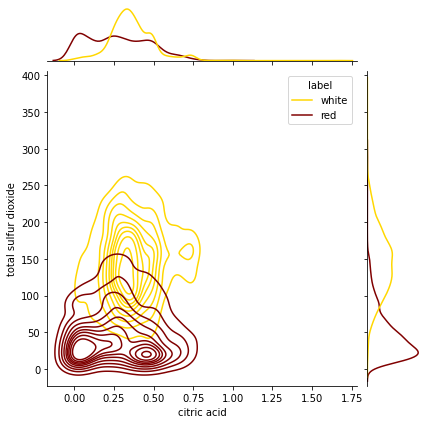

In [5]:
#plot distributions
#convert wine dataset to dataframe
wine_df = pd.DataFrame(wine_data[1:,:], columns=wine_data[0,:]).astype(float)
wine_df = wine_df.replace({'label': {0:'white', 1:'red'}}) #replace 0/1 label with white/red

#set custom color palette
colors = ["#FFD700", "#800000"] #gold and maroon hex codes
sns.set_palette(sns.color_palette(colors))

#plot joint distribution 
plot = sns.jointplot(data=wine_df,
                     x="citric acid", 
                     y="total sulfur dioxide", 
                     hue="label", 
                     kind="kde"
)

In [6]:
#calculate model performance on test set - need to beat 80%
pred_y_test, c0, c1 = GDA(test_x, test_y, m0, m1, cov, phi)
print('test set accuracy: ', evaluate(test_y, pred_y_test), '%')

test set accuracy:  88.4375 %


In [7]:
print('parameters\nm0:', m0, '\nm1:', m1, '\ncov:', cov, '\nphi:', phi)

parameters
m0: [  0.36232467 144.50630418] 
m1: [ 0.26805426 46.31472868] 
cov: [[3.10640639e-02 2.76427731e+00]
 [2.76427731e+00 3.94971642e+03]] 
phi: 0.5041031652989449


**Question 1:** Report the values of these parameters.
The mean of class 0 (white wine) is centered at (citric acid=0.36,total sulfur dioxide=144.51). The mean of class 1 (red wine) is centered at (citric acid=0.27,total sulfur dioxide=46.31). Phi is equal to 0.50. The covariance matrix is equal to [[var(citric acid)=0.03, cov(citric acid, total sulfur dioxide)=2.76],[cov(citric acid, total sulfur dioxide)=2.76]2.76, var(total sulfur dioxide)=3950]]


**Question 2:** In which scenario(s) is GDA expected to outperform logistic regression, and vice versa? 
GDA is expected to outperform logistic regression on datasets if the data is in accordance with GDA assumptions. GDA makes strong assumptions about the data, including that it is distributed on a multivariate normal distribution. GDA also requires less training data to learn a good model, so it performs better on smaller datasets that are in concordance with the assumptions. Logisitic regression is more robust since it makes fewer assumptions about the data and therefore will outperform GDA if the data follows a non-Gaussian distribution. 


**Question 3:** Show that when we assume that the class covariance matrices are equal, the GDA decision boundary is linear. You can type your derivation here using LaTeX notation, or if you prefer to write it by hand, you can upload a pdf or photo.
pdf uploaded

---
## Part 2: Support Vector Machine

Now, you will apply a Support Vector Machine (with radial basis function kernel) to the [Wisconsin Breast Cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). Use the columns 'perimeter (mean)' and 'symmetry (mean)' for the input features in your calculations. Here, rather than writing your own SVM class, you will be calling functions provided in scikit-learn: [documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

**Question 4:** Why is feature scaling important when using a support vector machine with the RBF kernel?
Support vector machines are a distance-based method. It is important for the features to have the same range so that the distance is not dominated by one feature that has high values. 

**Task 2**
<br><br>Using the WBC dataset, shuffle the dataset, split it using a 80/20  train/test partition, and perform feature scaling. You may refer to your code from Assignment 2 for those steps. Refer to instructions regarding feature scaling in the Logistic Regression section of Assignment 2.

In [8]:
#TODO - process and partition the data 
#load dataset
cancer = datasets.load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [9]:
#add target column to feature matrix
combined_cancer_mat = np.column_stack([cancer.data, cancer.target])

#shuffle dataset then separate features and targets
np.random.shuffle(combined_cancer_mat) #shuffle data
cancer_features = combined_cancer_mat[:,:-1]
cancer_targets = combined_cancer_mat[:,:31]

#split into training and testing sets
split_ind = int(len(cancer_features)*0.8) #get the 80th percentile index
train_x = np.array(cancer_features[:split_ind])
train_y = np.array(cancer_targets[:split_ind])
test_x = np.array(cancer_features[split_ind:])
test_y = np.array(cancer_targets[split_ind:])

In [9]:
'''
Feature scaling function that standardizes each features mean to 0 and variance to 1. 
@param x (numpy.ndarray) - feature dataset 
@return scaled_x (np.ndarray)
        mean (numpy.ndarray) - mean values of each feature in x
        std (numpy.ndarray) - standard deviation values of each feature in x
'''
def scale(x):
    #calculate mean and standard deviation if none is provided
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    
    scaled_x = (x-mean)/std #scale to mean=0, variance=1
    
    return scaled_x, mean, std

#feature scaling
scaled_train_x, train_x_mean, train_x_std = scale(train_x)
scaled_test_x = (test_x-train_x_mean)/train_x_std

**Question 5:** In the context of scikit-learn's SVM implementation (linked above), explain what hyperparameters C and gamma are, and describe the effects of increasing and decreasing their values.
the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words C behaves as a regularization parameter in the SVM

**Task 3**

You will implement k-fold cross-validation to select the SVM hyperparameters. Note: you must write k-fold CV yourself, do not use sklearn.model_selection.KFold. However, you may use scikit-learn's SVC (you don't need to implement support vector machine yourself).

- Choose three values of C and three values of gamma that you wish to consider. Additionally, pick a value of _k_ (# of cross-validation folds) 
- For each pair of hyperparameter values (C, gamma), perform k-fold cross validation *within the training set* you designated above.  
- Report the pair of hyperparameter values that yields the highest accuracy (averaged across the k iterations) on this k-fold CV.
- Using that pair of hyperparameters, train a "final" SVM using the *entire* training set
- Run and report the accuracy of this model on the held-out test set. 

In [28]:
kval=5
lst = list(range(15))
bin_size = len(lst)/kval

for k in range(kval):
    print('start: ',k*bin_size)
    print('stop: ',((1+k)*bin_size))


start:  0.0
stop:  3.0
start:  3.0
stop:  6.0
start:  6.0
stop:  9.0
start:  9.0
stop:  12.0
start:  12.0
stop:  15.0


In [23]:
bin_size = len(lst)/kval
bin_size

3.0

In [ ]:
#TODO - k-fold cross validation on SVMs
C = [0.1, 1, 5]
gamma = [0.1, 1, 5]
kvalue = 5

#perform k-fold cross-validation within the training set to select hyperparameters
cv = pd.DataFrame(columns=['C', 'gamma', 'performance']) #data structure to store accuracy with different hyperparameters
for c in C_list:
    for gam in gamma_list:
        perf = [] #store performance of k runs of SVC on training set
        for k in range(kvalue):
            
            split_ind = int(len(cancer_features)*0.8) 
            train_x = np.array(cancer_features[:split_ind])
            train_y = np.array(cancer_targets[:split_ind])
            test_x = np.array(cancer_features[split_ind:])
            test_y = np.array(cancer_targets[split_ind:])
            
            #split training set into training/testing set
            SVC_train_x = 
            SVC_train_y =
            SVC_test_x = 
            SVC_test_y = 
            
            model = SVC(C=c, gamma=gam, kernel='rbf') 
            model.fit(SVC_train_x, SVC_train_y)
            pred_y = model.predict(SVC_test_x)
            perf.append(evaluate(SVC_test_y, pred_y))
        
        #calculate overall model performance
        final_perf = sum(perf)/kvalue 
        cv.append({'C':c, 'gamma':gam, 'performance':final_perf})
        
            
            
optimized_C = 
optimized_gamma = 

#final SVC on entire training set
final_model = SVC(C=optimized_C, gamma=optimized_gamma, kernel='rbf')
model.fit(scaled_train_x, scaled_train_y)
            
#SVC on test set
pred_y = model.predict(scaled_test_x)
evaluate(scaled_test_y, pred_y)

**Question 6:** Which pair of hyperparameters were selected by k-fold CV? What was the accuracy of the corresponding model on the held-out test set?

**Question 7:** Discuss the effects of changing C and gamma. To illustrate your response, generate plots of the decision boundary resulting from different values of C and gamma, in the following way:
- Using the 'best' value of C (selected based on k-fold CV above), sweep over 2-3 different values of gamma, generating one plot of the decision boundary (superimposed on the training points) each time. Use the entire training set.
- Repeat the above, this time using the 'best' value of gamma (selected based on k-fold CV above) and sweeping over 2-3 different values of C.

In [ ]:
# The following code will plot the decision boundary on a dataset for a given classifier. 
# source: https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch02/ch02.ipynb
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # set up marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [ ]:
#TODO - analyze the effects of C and gamma

---
## Part 4: Submission 

Please upload a clean version of your work to Brightspace by the deadline. <em>If you use a separate PDF with your short answer questions, it should be added alongside the ipynb file as a PDF, and zipped up together as your solution.</em>

Below, please acknowledge your collaborators as well as any resources/references (beyond guides to Python syntax) that you have used in this assignment: